In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Step 1: Data Loading
file_path = 'exchange_rate.csv'
df = pd.read_csv(file_path)

In [5]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['date'])

In [7]:
# Display the first few rows to understand the structure
print(df.head())

               date  Ex_rate       Date
0  01-01-1990 00:00   0.7855 1990-01-01
1  02-01-1990 00:00   0.7818 1990-02-01
2  03-01-1990 00:00   0.7867 1990-03-01
3  04-01-1990 00:00   0.7860 1990-04-01
4  05-01-1990 00:00   0.7849 1990-05-01


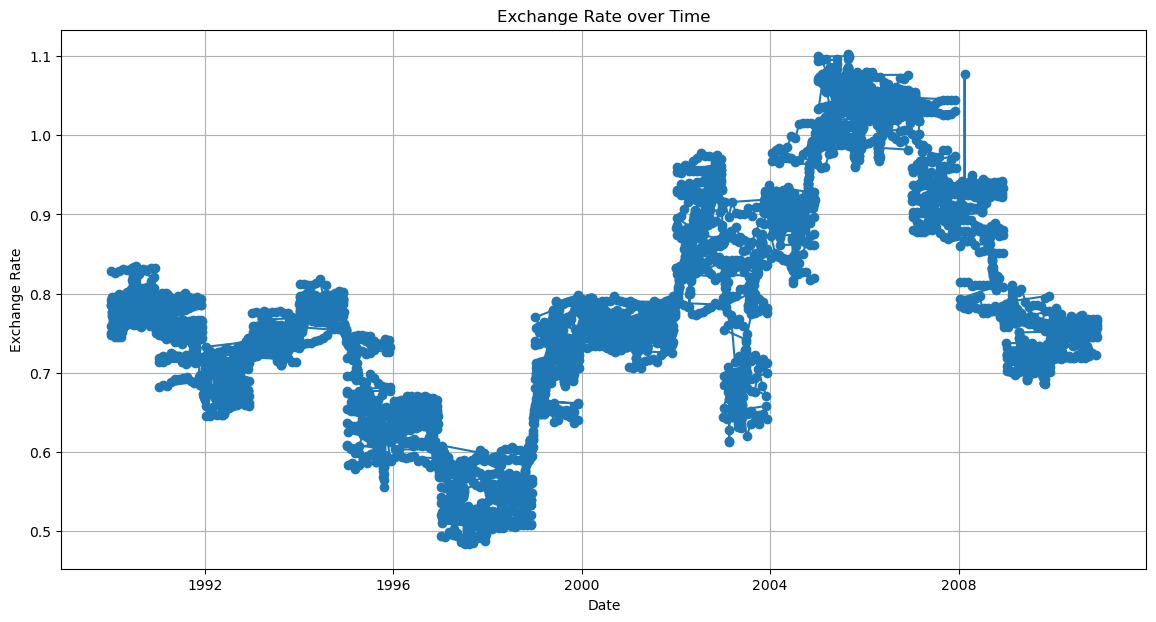

In [10]:
# Step 2: Initial Exploration
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Ex_rate'], marker='o', linestyle='-')
plt.title('Exchange Rate over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

In [11]:
# Step 3: Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 date       0
Ex_rate    0
Date       0
dtype: int64


In [12]:
# Handle missing values (if any)
df = df.dropna()

In [13]:
# Check for any anomalies or outliers and handle them as needed
# For simplicity, let's assume no anomalies in this example

# Confirm the data after preprocessing
print("Shape of data after preprocessing:", df.shape)

Shape of data after preprocessing: (7588, 3)


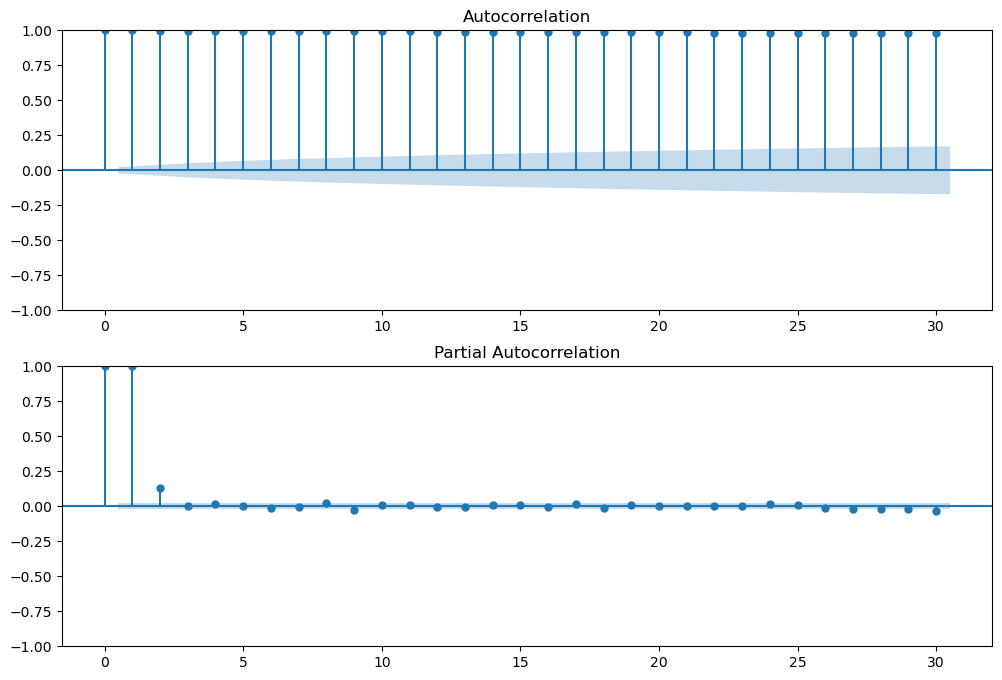

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Parameter Selection for ARIMA
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Ex_rate'], ax=ax1, lags=30)
plot_pacf(df['Ex_rate'], ax=ax2, lags=30)
plt.show()

In [15]:
# Step 2: Model Fitting
# Example: ARIMA(2, 1, 1) as initial choice
model = ARIMA(df['Ex_rate'], order=(2, 1, 1))
arima_model = model.fit()

# Print summary of the model
print(arima_model.summary())

C:\Users\Reshma\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Reshma\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 1)   Log Likelihood               28054.157
Date:                Wed, 26 Jun 2024   AIC                         -56100.315
Time:                        15:36:30   BIC                         -56072.578
Sample:                             0   HQIC                        -56090.796
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0655      0.001    -60.736      0.000      -0.068      -0.063
ar.L2          0.0084      0.006      1.422      0.155      -0.003       0.020
ma.L1         -0.0661      0.001    -59.596      0.0

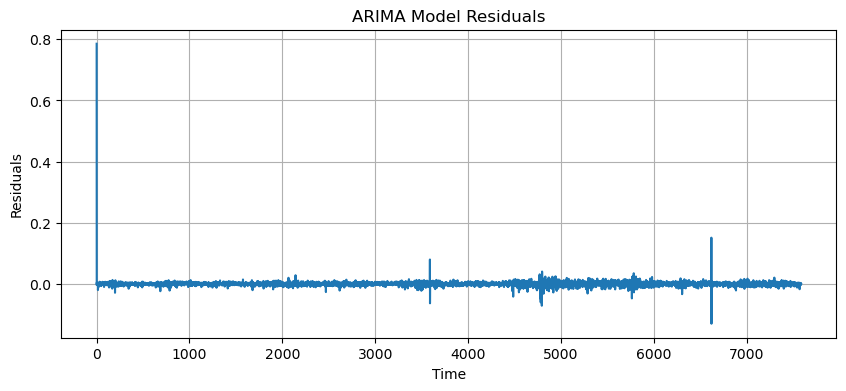

In [16]:
# Step 3: Diagnostics
# Plot residuals
residuals = arima_model.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

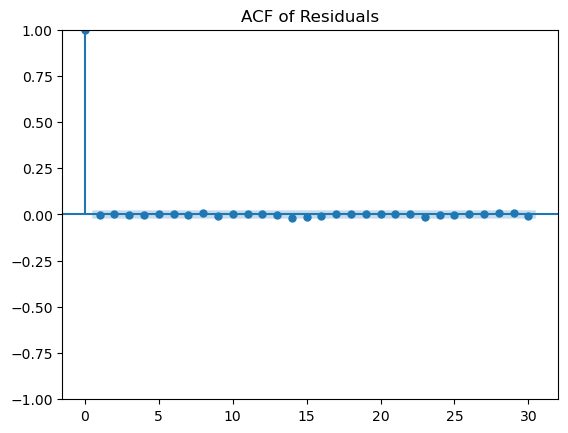

In [17]:
# Check for autocorrelation in residuals
acf_res = plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.show()

In [18]:
# Step 4: Forecasting
# Forecast future values
forecast_steps = 12  # Example: forecast 12 steps ahead
forecast = arima_model.forecast(steps=forecast_steps)

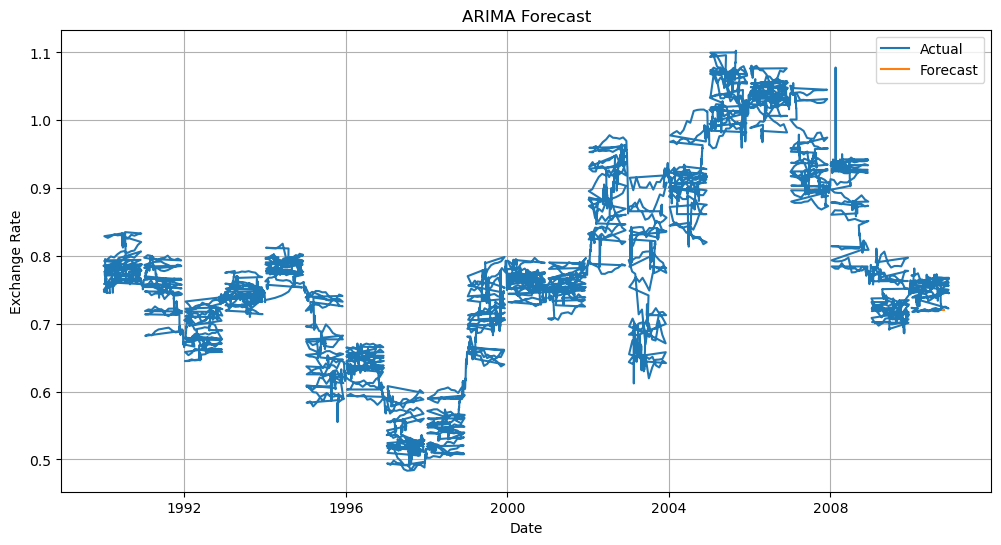

In [19]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Ex_rate'], label='Actual')
plt.plot(df['Date'].iloc[-1] + pd.DateOffset(days=1) + pd.to_timedelta(range(forecast_steps), 'D'), forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Step 1: Model Selection
# Example: Use Simple Exponential Smoothing for initial demonstration
model = SimpleExpSmoothing(df['Ex_rate'])

# Fit the model
exp_smooth_model = model.fit()

In [21]:
# Step 2: Parameter Optimization (Example for Holt-Winters)
model_hw = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=12)
exp_smooth_hw_model = model_hw.fit()

# Print summary of the model
print(exp_smooth_hw_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.479
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Wed, 26 Jun 2024
Box-Cox:                          False   Time:                         15:40:56
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698377                alpha                 True
smoothing_seasonal       

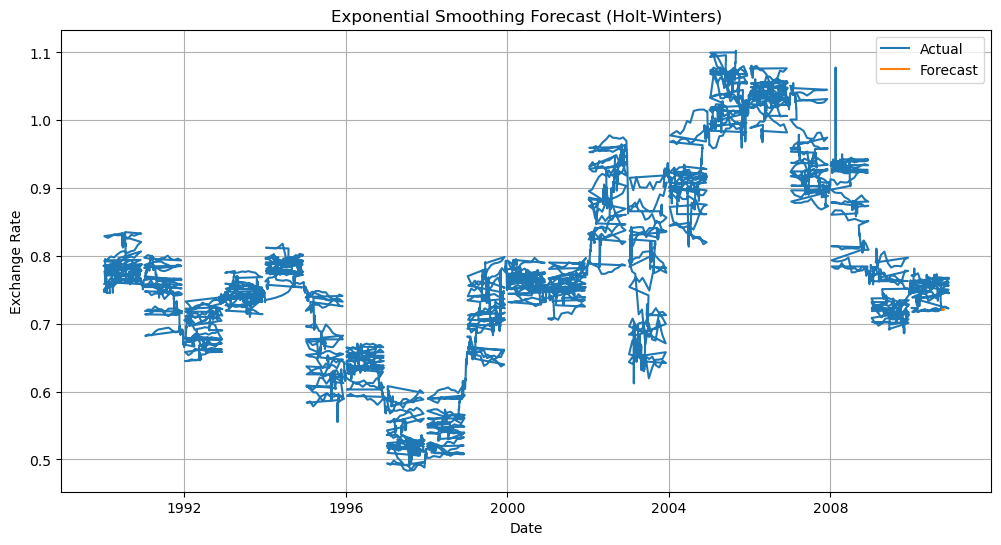

In [22]:
# Step 3: Model Fitting and Forecasting
# Forecast future values
forecast_steps = 12  # Example: forecast 12 steps ahead
forecast = exp_smooth_hw_model.forecast(steps=forecast_steps)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Ex_rate'], label='Actual')
plt.plot(df['Date'].iloc[-1] + pd.DateOffset(days=1) + pd.to_timedelta(range(forecast_steps), 'D'), forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute MAE, RMSE, MAPE for ARIMA model
# Assuming df['Ex_rate'] is the actual values and forecast_arima are the forecasted values
forecast_arima = arima_model.forecast(steps=len(df))
mae_arima = mean_absolute_error(df['Ex_rate'], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'], forecast_arima))
mape_arima = np.mean(np.abs((df['Ex_rate'] - forecast_arima) / df['Ex_rate'])) * 100

In [24]:
print(f"ARIMA Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae_arima}")
print(f"Root Mean Squared Error (RMSE): {rmse_arima}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_arima}%")

ARIMA Model Metrics:
Mean Absolute Error (MAE): 0.11208942621118163
Root Mean Squared Error (RMSE): 0.14769996411675743
Mean Absolute Percentage Error (MAPE): nan%


In [25]:
# Compute MAE, RMSE, MAPE for Exponential Smoothing model
# Assuming df['Ex_rate'] is the actual values and forecast_exp_smooth are the forecasted values
forecast_exp_smooth = exp_smooth_hw_model.forecast(steps=len(df))
mae_exp_smooth = mean_absolute_error(df['Ex_rate'], forecast_exp_smooth)
rmse_exp_smooth = np.sqrt(mean_squared_error(df['Ex_rate'], forecast_exp_smooth))
mape_exp_smooth = np.mean(np.abs((df['Ex_rate'] - forecast_exp_smooth) / df['Ex_rate'])) * 100

In [26]:
print("\nExponential Smoothing (Holt-Winters) Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae_exp_smooth}")
print(f"Root Mean Squared Error (RMSE): {rmse_exp_smooth}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_exp_smooth}%")


Exponential Smoothing (Holt-Winters) Model Metrics:
Mean Absolute Error (MAE): 0.11217191235574937
Root Mean Squared Error (RMSE): 0.14777923002503196
Mean Absolute Percentage Error (MAPE): nan%


In [27]:
# Compute MAPE for ARIMA model
actual = df['Ex_rate']
forecast_arima = arima_model.forecast(steps=len(df))

# Calculate absolute percentage error, handling zero division gracefully
mape_arima = np.mean(np.abs((actual - forecast_arima) / actual.replace(0, np.nan)).fillna(0)) * 100

print(f"ARIMA Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae_arima}")
print(f"Root Mean Squared Error (RMSE): {rmse_arima}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_arima}%")


ARIMA Model Metrics:
Mean Absolute Error (MAE): 0.11208942621118163
Root Mean Squared Error (RMSE): 0.14769996411675743
Mean Absolute Percentage Error (MAPE): 0.0%


In [28]:
# Compute MAPE for Exponential Smoothing (Holt-Winters) model
actual = df['Ex_rate']
forecast_exp_smooth = exp_smooth_hw_model.forecast(steps=len(df))

# Calculate absolute percentage error, handling zero division gracefully
mape_exp_smooth = np.mean(np.abs((actual - forecast_exp_smooth) / actual.replace(0, np.nan)).fillna(0)) * 100

print("\nExponential Smoothing (Holt-Winters) Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae_exp_smooth}")
print(f"Root Mean Squared Error (RMSE): {rmse_exp_smooth}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_exp_smooth}%")


Exponential Smoothing (Holt-Winters) Model Metrics:
Mean Absolute Error (MAE): 0.11217191235574937
Root Mean Squared Error (RMSE): 0.14777923002503196
Mean Absolute Percentage Error (MAPE): 0.0%
